# MATH 307 Assignment 3

* See [Mathematical Python](https://www.math.ubc.ca/~pwalls/math-python/) for an introduction to Python and Jupyter
* See [MATH 307 Jupyter Notebooks](https://ubcmath.github.io/MATH307/) for examples
* Run the tests to verify your solutions but note there are **hidden tests**
* Submit your `.ipynb` notebook file to Canvas

In [141]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

# Problem 1 (4 marks)

The following code imports and plots a dataset:

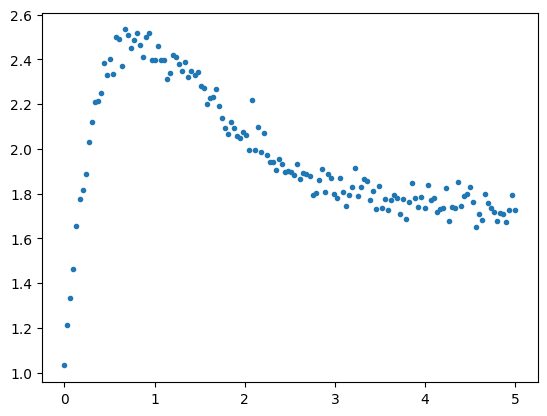

In [142]:
data = np.genfromtxt('data.csv',delimiter=',')
t = data[:,0]
y = data[:,1]
plt.plot(t,y,'.')
plt.show()

Find a model of the form

$$
f(t) = c_0 + c_1 e^{-t} + c_2 e^{-2t} + c_3 e^{-3t}
$$

which best fits the data (by minimizing the sum of squared errors SSE). Save the coefficients as vector `c`.

In [143]:
# YOUR CODE HERE
# Define the model function
A = np.column_stack([np.ones(len(data)), np.exp(-t), np.exp(-2*t), np.exp(-3*t)])
c = la.solve(A.T@A, A.T@y)

print(c)

[ 1.69713587  3.12457287 -2.45639745 -1.36793931]


In [144]:
"Verify type and size of c. (2 marks)"
assert isinstance(c,np.ndarray)
assert c.size == 4
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [145]:
"Verify value c. This cell contains hidden tests. (2 marks)"
assert np.round(c[0],1) == 1.7
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


Plot the result:

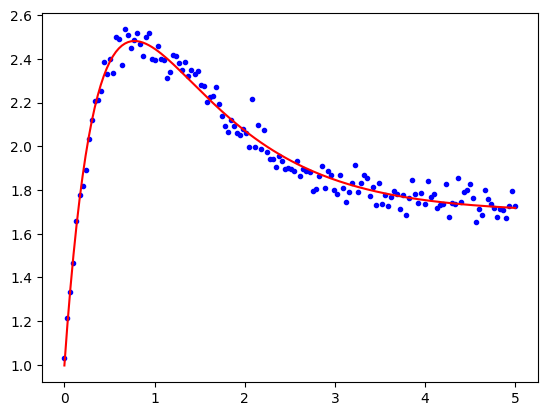

In [146]:
y_pred = c[0] + c[1]*np.exp(-t) + c[2]*np.exp(-2*t)+ c[3]*np.exp(-3*t)
plt.plot(t,y,'b.',t,y_pred,'r')
plt.show()

## Problem 2 (5 marks)

Compute eigenvalues and eigenvectors of a matrix $A$ with the function [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html). The function returns eigenvalues as a vector and the eigenvectors as a matrix where column $i$ is the eigenvector with eignvalue in entry $i$ of the eigenvalue vector. For example, in the cell below, verify the eigenvalues and eigenectors of $A$ where

$$
A = \begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix} \hspace{20mm}
\lambda_1 = 6 \ , \ \mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \hspace{20mm}
\lambda_2 = 4 \ , \ \mathbf{v}_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \hspace{20mm}  
$$

Notice that eigenvalues are always returned as complex numbers. Real eigenvalues simply have 0 imaginary part which SciPy writes as `0.j`.

In [147]:
A = np.array([[5.,1.],[1.,5.]])
evals, evecs = la.eig(A)

print("Eignvalues:")
print(evals,"\n")
print("Eigenvectors:")
print(evecs)

Eignvalues:
[6.+0.j 4.+0.j] 

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The goal of this exercise is to compute the eigenvalues of $A_1A_1^T$ where $A_1$ is a Vandermonde matrix and then use the result to compute the condition number of $A_1$.

(a) Create the Vandermonde matrix for $t_0=0,\dots,t_5=5$ and save the result as `A1`. Recall, we use the definition of the Vandermonde matrix with values increasing from left to right.

In [148]:
# YOUR CODE HERE
x = np.array([0,1,2,3,4,5])
A1 = np.vander(x, 6, increasing=True)
print(A1)

[[   1    0    0    0    0    0]
 [   1    1    1    1    1    1]
 [   1    2    4    8   16   32]
 [   1    3    9   27   81  243]
 [   1    4   16   64  256 1024]
 [   1    5   25  125  625 3125]]


In [149]:
"Verify type of A1. (1 mark)"
assert isinstance(A1,np.ndarray) , "A1 should be a NumPy array."
print("Problem 2a Test 1: Success!")

Problem 2a Test 1: Success!


In [150]:
"Verify entries of A1. This cell contains hidden tests. (1 mark)"
assert np.allclose(A1[:,1],[0,1,2,3,4,5]) , "Second column of A1 should be [0,1,2,3,4,5]."
print("Problem 2a Test 2: Success!")

Problem 2a Test 2: Success!


(b) Compute the eigenvalues of $A_1A_1^T$. We know that the eigenvalues are real and non-negative. Use the function `np.real` to convert the values to real numbers. Save the largest eigenvalue as `lambda_max` and the smallest eigenvalue as `lambda_min`.

In [151]:
# YOUR CODE HERE
AAT = A1 @ A1.T
evals, evecs = la.eig(AAT)
evals = np.real(evals)
print(evals)
lambda_max = max(evals)
lambda_min = min(evals)
print(lambda_max, lambda_min)

[1.13546124e+07 4.17567120e+03 1.91018668e+01 1.58299312e+00
 2.44176167e-01 3.41185644e-03]
11354612.39635425 0.0034118564352919266


In [152]:
"Verify values are real numbers. (1 mark)"
assert isinstance(lambda_max,np.float64)
assert isinstance(lambda_min,np.float64)
print("Problem 2b Test 1: Success!")

Problem 2b Test 1: Success!


In [153]:
"Verify values lambda_max and lambda_min. This cell contains hidden tests. (1 mark)"
assert lambda_max > 0
assert lambda_min > 0
print("Problem 2b Test 2: Success!")

Problem 2b Test 2: Success!


(c) The condition number of $A_1$ is given by $\mathrm{cond}(A_1) = \sqrt{\lambda_{max}/\lambda_{min}}$ where $\lambda_{max}$ and $\lambda_{min}$ are the maximum and minimum (nonzero) eigenvalues of $A_1A_1^T$. Compute the value $\sqrt{\lambda_{max}/\lambda_{min}}$ and save the result as `C`.

In [154]:
# YOUR CODE HERE
C = np.sqrt(lambda_max/lambda_min)
print(C) 

57688.70400931139


In [155]:
"Verify value of C. This cell contains hidden tests. (1 mark)"
assert C > 1e4
print("Problem 2c Test 1: Success!")

Problem 2c Test 1: Success!


## Problem 3 (5 marks)

The following code imports the digits dataset from [sklearn](https://scikit-learn.org/stable/) and selects the subset of the data correpsonding to the digit `9`.

    data = datasets.load_digits()
    X = data['data']
    y = data['target']
    X9 = X[y == 9] # This line selects the rows corresponding to 9s

Copy, paste and modify this code to find the first weight vector for the data consisting of the digit `4`. Use the code from [MATH 307 notebook on PCA](https://ubcmath.github.io/MATH307/notebooks/07_pca.html). Reshape the first weight vector as a 8 by 8 matrix and save the result as `W`.

In [156]:
from sklearn import datasets
from sklearn.decomposition import PCA
# YOUR CODE HERE
data = datasets.load_digits()
X = data['data']
y = data['target']
X4 = X[y == 4]

X4 = X4 - X4.mean(axis=0)
P,S,QT = la.svd(X4)
W = QT[0,:].reshape(8,8)
print(W[4:6,4:6])

[[-0.15131046  0.05404152]
 [ 0.00949909  0.27111392]]


In [157]:
"Verify W is a NumPy array. (1 mark)"
assert isinstance(W,np.ndarray)
print("Problem 3 Test 1: Success!")

Problem 3 Test 1: Success!


In [158]:
"Verify W has the correct size. (1 mark)"
assert W.shape == (8,8)
print("Problem 3 Test 2: Success!")

Problem 3 Test 2: Success!


In [159]:
"Verify W has correct values (up to absolute value). This cell contains hidden tests. (3 marks)"
assert np.allclose(np.abs(W[4:6,4:6]),np.abs(np.array([[0.15131046, 0.05404152],[0.00949909, 0.27111392]])))
print("Problem 3 Test 3: Success!")

Problem 3 Test 3: Success!


Visualize the weight vector:

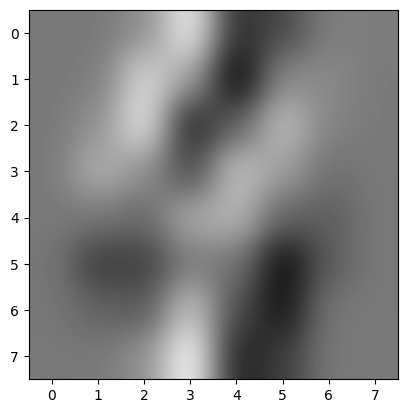

In [160]:
plt.imshow(W,cmap='binary',interpolation='gaussian')
plt.show()

## Problem 4 (10 marks)

The SVD of a matrix $A = P \Sigma Q^T$ yields a formula for $A$ as a sum of rank one matrices

$$
A = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_r \mathbf{p}_r \mathbf{q}_r^T
$$

The truncated SVD of rank $k \leq r$ is given by

$$
A_k = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_k \mathbf{p}_k \mathbf{q}_k^T
$$

Note that the product of vectors $\mathbf{p} \mathbf{q}^T$ is called the outer product. Use the function [`numpy.outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) to compute the outer product of vectors.

The following cell creates a Toeplitz matrix $A$ of size $N$.

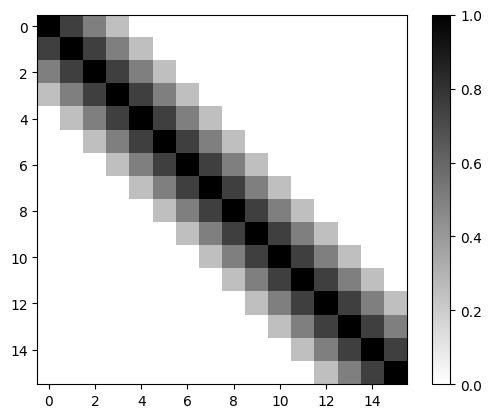

In [161]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.colorbar()
plt.show()

(a) Compute the SVD of $A$, compute $\sigma_1 \mathbf{p}_1 \mathbf{q}_1^T$ and save the result as `s1p1q1T`. Recall, in Python, array indices begin at 0 not 1.

In [162]:
# YOUR CODE HERE
P, S, QT = la.svd(A)
s1 = S[0]
p1 = P[:,0]
q1 = QT[0,:]
s1p1q1T = s1 * (np.outer(p1,q1.T))
print(s1p1q1T)

[[0.03147122 0.04833746 0.0657645  0.08194596 0.09501086 0.10530624
  0.11235837 0.11592495 0.11592495 0.11235837 0.10530624 0.09501086
  0.08194596 0.0657645  0.04833746 0.03147122]
 [0.04833746 0.07424275 0.10100939 0.12586292 0.14592964 0.16174257
  0.17257413 0.17805213 0.17805213 0.17257413 0.16174257 0.14592964
  0.12586292 0.10100939 0.07424275 0.04833746]
 [0.0657645  0.10100939 0.13742618 0.17124013 0.19854147 0.22005542
  0.23479206 0.24224504 0.24224504 0.23479206 0.22005542 0.19854147
  0.17124013 0.13742618 0.10100939 0.0657645 ]
 [0.08194596 0.12586292 0.17124013 0.21337405 0.24739293 0.27420043
  0.29256305 0.30184984 0.30184984 0.29256305 0.27420043 0.24739293
  0.21337405 0.17124013 0.12586292 0.08194596]
 [0.09501086 0.14592964 0.19854147 0.24739293 0.28683555 0.31791705
  0.33920728 0.3499747  0.3499747  0.33920728 0.31791705 0.28683555
  0.24739293 0.19854147 0.14592964 0.09501086]
 [0.10530624 0.16174257 0.22005542 0.27420043 0.31791705 0.35236655
  0.37596378 0.38

In [163]:
"Verify s1p1q1T is a NumPy array. (1 mark)"
assert isinstance(s1p1q1T,np.ndarray)
print("Problem 4a Test 1: Success!")

Problem 4a Test 1: Success!


In [164]:
"Verify s1p1q1T is the correct size. (1 mark)"
assert s1p1q1T.shape == (16,16)
print("Problem 4a Test 2: Success!")

Problem 4a Test 2: Success!


In [165]:
"Verify s1p1q1T has the correct values. This cell contains hidden tests. (1 mark)"
assert np.allclose(s1p1q1T[:2,:2],np.array([[0.03147122, 0.04833746],[0.04833746, 0.07424275]]))
print("Problem 4a Test 3: Success!")

Problem 4a Test 3: Success!


(b) Plot the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ for different values $k$ using the code

    skpkqkT = # Modify your code from part (a)
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()
    plt.show()

Based on your observations, determine whether the following statement is `True` or `False`:

> As $k$ increases, the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ contains higher frequency data. In other words, as $k$ increases, the entries in the matrix oscillate more quickly from entry to entry across the matrix.

Save your response to the variable `observation4b`.

In [166]:
observation4b = True

In [167]:
"Verify observation4b is defined as True or False (boolean value). (1 mark)"
assert isinstance(observation4b,bool)
print("Problem 4b Test 1: Success!")

Problem 4b Test 1: Success!


In [168]:
"Verify observation4b has correct value. This cell contains hidden tests. (1 mark)"
assert isinstance(observation4b,bool)
print("Problem 4b Test 2: Success!")

Problem 4b Test 2: Success!


(c) Use `plt.plot(S,'.b')` to plot the singular values of $A$ as a scatter plot. How many singular values are greater than $1$? Save your response as `n_singular_values`.

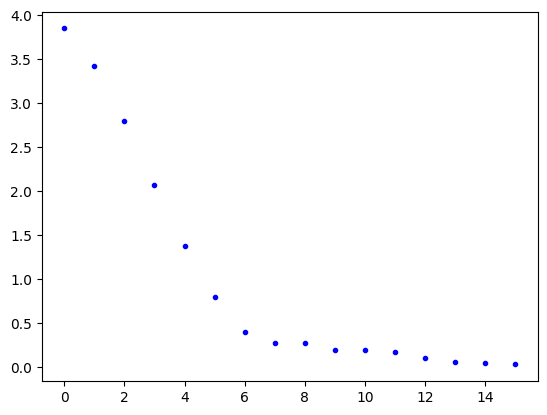

In [169]:
# YOUR CODE HERE
plt.plot(S,'.b')
n_singular_values = 5

In [170]:
"Verify n_singular_values is defined as an integer. (1 mark)"
assert isinstance(n_singular_values,int)
print("Problem 4c Test 1: Success!")

Problem 4c Test 1: Success!


In [171]:
"Verify n_singular_values has correct value. This cell contains hidden tests. (1 mark)"
assert isinstance(n_singular_values,int)
print("Problem 4c Test 2: Success!")

Problem 4c Test 2: Success!


(d) The following code computes the truncated SVD $A_k$

    Ak = sum([S[i]*np.outer(P[:,i],QT[i,:]) for i in range(0,k)])

Copy, paste and modify the code to compute the truncated pseudoinverse

$$
A_k^+ = \frac{1}{\sigma_1} \mathbf{q}_1 \mathbf{p}_1^T + \cdots + \frac{1}{\sigma_k} \mathbf{q}_k \mathbf{p}_k^T
$$

where $k$ is the number found in part (c). In other words, $\sigma_1,\dots,\sigma_k > 1$ and $\sigma_m \leq 1$ for $m > k$. Save the result as `Ak_plus`.

In [172]:
# YOUR CODE HERE
k = n_singular_values

Ak_plus = sum([(1/S[i])*np.outer(QT[i,:],P[:,i].T) for i in range(0,k)])
print(Ak_plus[:2,:2])

[[0.19102766 0.16831285]
 [0.16831285 0.16005372]]


In [173]:
"Verify Ak_plus is a 16 by 16 NumPy array. (1 mark)"
assert isinstance(Ak_plus,np.ndarray)
assert Ak_plus.shape == (16,16)
print("Problem 4d Test 1: Success!")

Problem 4d Test 1: Success!


In [174]:
"Verify Ak_plus has the correct values. This cell contains hidden tests. (2 marks)"
assert np.allclose(Ak_plus[:2,:2],np.array([[0.19102766,  0.16831285],[0.16831285,  0.16005372]]))
print("Problem 4d Test 2: Success!")

Problem 4d Test 2: Success!
